In [1]:
#Librerias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EX1_Decision_Tree_Dataset.csv')
df.head(2)

,age,experience,rank,nationality,attended
0,36,10,9,UK,NO
1,42,12,4,USA,NO


In [3]:
inputs = df.drop('attended', axis='columns')
#target = df['attended'] # target column --> Con ciertas características (age, experience, rank & nationality) acudiría a un espectáculo?

le_target = LabelEncoder()
target = le_target.fit_transform(df['attended']) # target column --> Con ciertas características (age, experience, rank & nationality) acudiría a un espectáculo?
target

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [4]:
# Convertir los inputs de textos a numeros para que el modelo lo pueda interpretar
le_nationality = LabelEncoder()

inputs_n = pd.DataFrame()
inputs_n['age_n'] = inputs['age'] # crear una nueva columna SIN la transformación
inputs_n['experience_n'] = inputs['experience'] # crear una nueva columna SIN la transformación
inputs_n['rank_n'] = inputs['rank'] # crear una nueva columna SIN la transformación
inputs_n['nationality_n'] = le_nationality.fit_transform(inputs['nationality']) # crear una nueva columna CON la transformación
inputs_n

,age_n,experience_n,rank_n,nationality_n
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2
5,44,14,5,1
6,66,3,7,0
7,35,14,9,1
8,52,13,7,0
9,35,5,9,0


In [5]:
# Entrenar el modelo
model = DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [6]:
model.score(inputs_n, target) # score = 1 pq es el mismo que utilizo para entrenar al modelo

1.0

In [7]:
# Prediction -> age=25, experience=4, rank=16, nationality=1=UK -> (25,4,16,1) ---> 1 = SÍ que acudiría a su espectáculo
model.predict([[25,4,16,1]])

/home/albertlnz/Desktop/Programming/Languages/Python/STUDY_PROJECTS/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [8]:
# Prediction -> age=19, experience=6, rank=2, nationality=0=OTHER -> (53,18,32,0) ---> 0 = NO acudiría a su espectáculo
model.predict([[19,6,2,0]])

/home/albertlnz/Desktop/Programming/Languages/Python/STUDY_PROJECTS/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

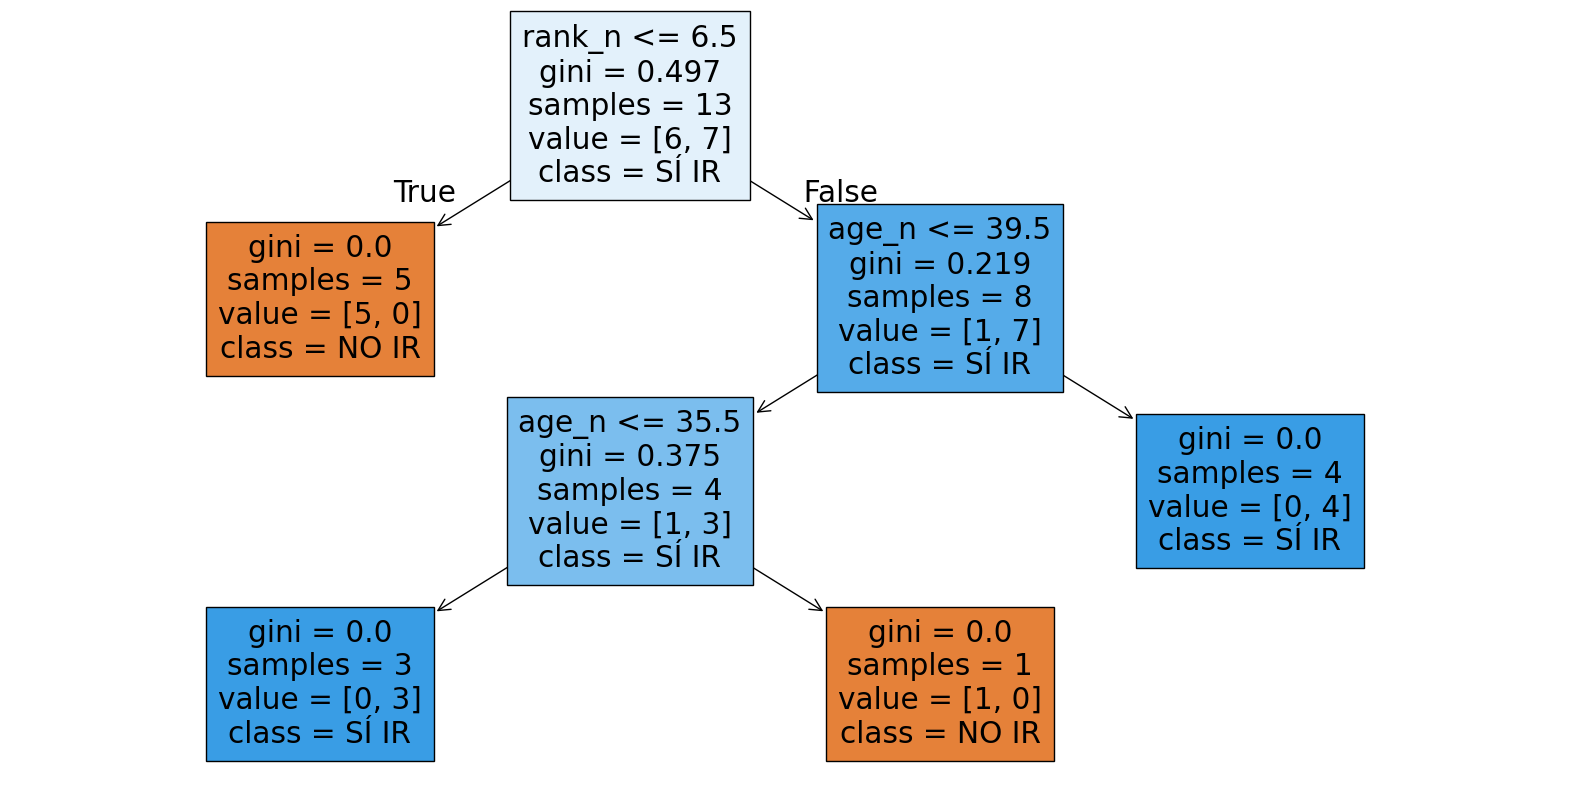

In [9]:
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura para que el árbol se vea mejor
plot_tree(model, filled=True, feature_names=['age_n', 'experience_n', 'rank_n', 'nationality_n'], class_names=['NO IR', 'SÍ IR'])
plt.show()

In [10]:
# Importar librerías necesarias
from sklearn.tree import export_text

# Mostrar las reglas de decisión del árbol
tree_rules = export_text(model, feature_names=['age_n', 'experience_n', 'rank_n', 'nationality_n'])
print(tree_rules)

# Importancia de las características
importances = model.feature_importances_
for feature, importance in zip(['age_n', 'experience_n', 'rank_n', 'nationality_n'], importances):
    print(f"{feature}: {importance}")


|--- rank_n <= 6.50
|   |--- class: 0
|--- rank_n >  6.50
|   |--- age_n <= 39.50
|   |   |--- age_n <= 35.50
|   |   |   |--- class: 1
|   |   |--- age_n >  35.50
|   |   |   |--- class: 0
|   |--- age_n >  39.50
|   |   |--- class: 1

age_n: 0.2708333333333333
experience_n: 0.0
rank_n: 0.7291666666666667
nationality_n: 0.0
